# *Hypothesis Testing*
## T-Test, Z-Test, Anova Test , $\chi^2$-Test 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

mean = 0
std = 1

samples = np.random.normal(mean, std, size=10000)

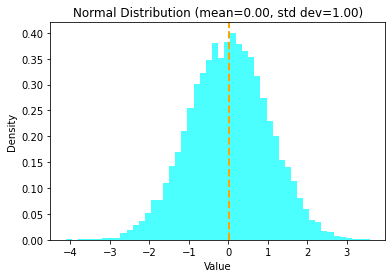

In [3]:
# Plot a histogram of the generated samples
# plt.style.use("seaborn-notebook")
plt.hist(samples, bins=50, density=True, alpha=0.7, color='aqua')

# Add a vertical line at the mean
plt.axvline(np.mean(samples), color='orange', linestyle='dashed', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Normal Distribution (mean={:.2f}, std dev={:.2f})'.format(mean, std))

# Show the plot
plt.show()

In [4]:
sample_mean = np.mean(samples)
print('Sample mean: {:.2f}'.format(sample_mean))
# print(samples)
#T-testing the mean of the sample with the mean of the population
tmean = 0.0
print(ttest_1samp(samples, tmean))
tset, pval = ttest_1samp(samples, tmean)
print("p-value",pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Sample mean: 0.01
Ttest_1sampResult(statistic=1.1578999087941289, pvalue=0.24693254133379228)
p-value 0.24693254133379228
accept null hypothesis


In [5]:
# Generate two sets of random data with 100 samples each
np.random.seed(123)
group1 = np.random.normal(5, 2, 1000)
group2 = np.random.normal(5, 3, 1000)

# Calculate the t-statistic and p-value using a two-sample t-test
t_stat, p_val = ttest_ind(group1, group2)

# Print the results
print("t-statistic = {:.4f}".format(t_stat))
print("p-value = {:.4f}".format(p_val))


if p_val<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


t-statistic = -0.9412
p-value = 0.3467
accept null hypothesis


Text(0.05, 0.8, 'p-value = 0.3467')

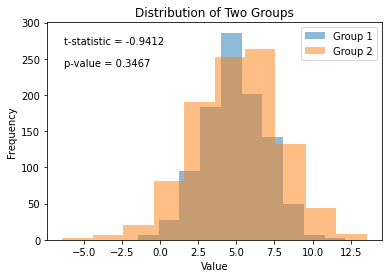

In [6]:
# Plot the distributions of the two groups
fig, ax = plt.subplots()
ax.hist(group1, alpha=0.5, label='Group 1')
ax.hist(group2, alpha=0.5, label='Group 2')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Two Groups')
ax.legend(loc='best')

# Add the t-statistic and p-value to the plot
ax.text(0.05, 0.9, 't-statistic = {:.4f}'.format(t_stat), transform=ax.transAxes)
ax.text(0.05, 0.8, 'p-value = {:.4f}'.format(p_val), transform=ax.transAxes)


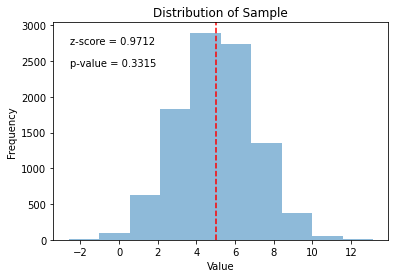

In [7]:
#Z-test if sample size is large(>30)
from scipy.stats import norm


# Generate a random sample of 100 values with mean 5 and standard deviation 2
np.random.seed(123)
sample = np.random.normal(5, 2, 10000)

# Calculate the z-score using the standard normal distribution
z_score = (np.mean(sample) - 5) / (2 / np.sqrt(len(sample)))

# Calculate the p-value using the standard normal distribution
p_val = 2 * (1 - norm.cdf(abs(z_score)))

# Plot the distribution of the sample
fig, ax = plt.subplots()
ax.hist(sample, alpha=0.5)
ax.axvline(x=np.mean(sample), color='red', linestyle='--')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sample')
ax.text(0.05, 0.9, 'z-score = {:.4f}'.format(z_score), transform=ax.transAxes)
ax.text(0.05, 0.8, 'p-value = {:.4f}'.format(p_val), transform=ax.transAxes)

plt.show()


accept null hypothesis


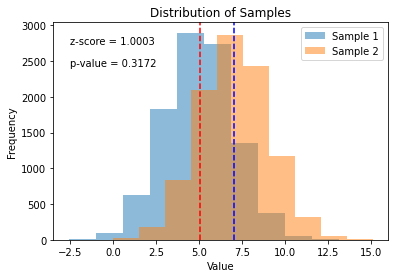

In [8]:

# Generate two random samples of 100 values each with means 5 and 6 and standard deviation 2
np.random.seed(123)
sample1 = np.random.normal(5, 2, 10000)
sample2 = np.random.normal(7, 2, 10000)

# Calculate the difference between the means of the two samples
mean_diff = np.mean(sample2) - np.mean(sample1)
dof = len(sample1)-1
# Calculate the pooled standard deviation
pooled_sd = np.sqrt(((dof * np.var(sample1)) + (dof * np.var(sample2))) / (2 * dof))

# Calculate the z-score using the standard normal distribution
z_score = mean_diff / pooled_sd

# Calculate the p-value using the standard normal distribution
p_val = 2 * (1 - norm.cdf(abs(z_score)))

if p_val<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
    
# Plot the distributions of the two samples
fig, ax = plt.subplots()
ax.hist(sample1, alpha=0.5, label='Sample 1')
ax.hist(sample2, alpha=0.5, label='Sample 2')
ax.axvline(x=np.mean(sample1), color='red', linestyle='--')
ax.axvline(x=np.mean(sample2), color='blue', linestyle='--')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Samples')
ax.text(0.05, 0.9, 'z-score = {:.4f}'.format(z_score), transform=ax.transAxes)
ax.text(0.05, 0.8, 'p-value = {:.4f}'.format(p_val), transform=ax.transAxes)
ax.legend()

plt.show()


F-score = 104.2767
p-value = 0.0000
reject null hypothesis


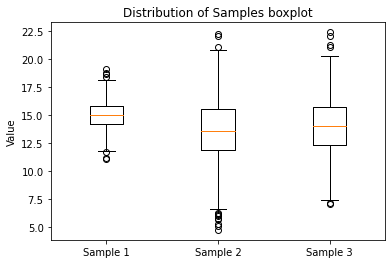

In [9]:
# ANOVA test
#The ANOVA test is used to compare the means of more than two groups.
# Generate three random samples of 100 values each with means 5, 6, and 7 and standard deviation 2

#One way ANOVA test
#(whether two or more groups are similar or not based on their mean similarity and f-score)
sample1 = np.random.normal(15, 1.2, 1000)
sample2 = np.random.normal(13.5, 2.8, 1000)
sample3 = np.random.normal(14, 2.5, 1000)

f_score, p_val = f_oneway(sample1, sample2, sample3)

print("F-score = {:.4f}".format(f_score))
print("p-value = {:.4f}".format(p_val))


if p_val<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
    
# Plot the distributions of the three samples box plot 
fig, ax = plt.subplots()
ax.boxplot([sample1, sample2, sample3])
ax.set_xticklabels(['Sample 1', 'Sample 2', 'Sample 3'])
ax.set_ylabel('Value')
ax.set_title('Distribution of Samples boxplot')
plt.show()


In [10]:
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# Create a dataframe
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
                          'Watering': np.repeat(['daily', 'weekly'], 15),
                          'height': [14, 16, 15, 15, 16, 13, 12, 11,
                                     14, 15, 16, 16, 17, 18, 14, 13, 
                                     14, 14, 14, 15, 16, 16, 17, 18,
                                     14, 13, 14, 14, 14, 15]})
  
  
# Performing two-way ANOVA
model = ols('height ~ C(Fertilizer) + C(Watering) + C(Fertilizer):C(Watering)',
        data=dataframe).fit()
result = sm.stats.anova_lm(model, type=2)
  
# Print the result
print(result)


                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   0.000369  0.000369  0.000133  0.990865
C(Fertilizer):C(Watering)   1.0   0.040866  0.040866  0.014796  0.904053
Residual                   28.0  77.333333  2.761905       NaN       NaN


                            sum_sq     df          F        PR(>F)
C(Factor1)              467.040166    1.0  45.606898  3.304309e-10
C(Factor2)                0.499789    2.0   0.024402  9.758969e-01
C(Factor1):C(Factor2)     6.596241    2.0   0.322064  7.251721e-01
Residual               1474.640618  144.0        NaN           NaN


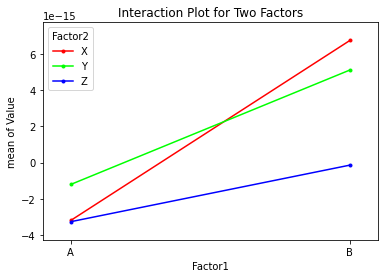

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for 2 factors and 3 groups
factor1 = np.repeat(['A', 'B'], 75)
factor2 = np.tile(['X', 'Y', 'Z'], 50)
group1 = np.random.normal(loc=10, scale=3, size=50)
group2 = np.random.normal(loc=12, scale=3, size=50)
group3 = np.random.normal(loc=15, scale=3, size=50)
data = pd.DataFrame({'Factor1': factor1, 'Factor2': factor2, 'Value': np.concatenate([group1, group2, group3])})

# Perform two-way ANOVA test
model = ols('Value ~ C(Factor1) + C(Factor2) + C(Factor1):C(Factor2)', data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print results
print(anova_table)

# Plot interaction plot to visualize the interaction effect of two factors
interaction_plot = pd.DataFrame({'Factor1': factor1, 'Factor2': factor2, 'Value': model.resid})
fig, ax = plt.subplots()
sm.graphics.interaction_plot(x=interaction_plot['Factor1'], trace=interaction_plot['Factor2'], response=interaction_plot['Value'], ax=ax)
ax.set_title('Interaction Plot for Two Factors')
plt.show()


Observed: [10 10  1  2 14  6  9  8 13  5  1 13  7  5  6]
Expected: [7 3 3 5 6 9 5 1 4 5 5 7 4 1 5]
Chi-squared statistic: 131.66190476190474
p-value: 0.0
reject null hypothesis


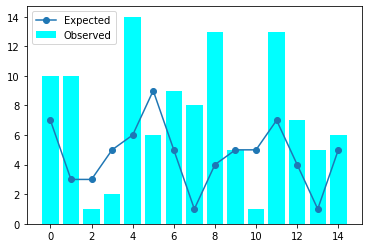

In [21]:
#CHI SQUARE TEST
from scipy.stats import chi2


# Generate some random data
observed = np.random.randint(1, 15, 15)
expected = np.random.randint(1, 10, 15)

# Perform the chi-square test
chi_squared_statistic = sum((observed - expected) ** 2 / expected)
p_value = 1 - chi2.cdf(chi_squared_statistic, len(observed) - 1)

# Print the results
print("Observed:", observed)
print("Expected:", expected)
print("Chi-squared statistic:", chi_squared_statistic)
print("p-value:", p_value)

if p_value<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
# Plot the observed and expected data
fig, ax = plt.subplots()
ax.bar(np.arange(len(observed)), observed, label='Observed', color='aqua')
ax.plot(expected, label='Expected', marker='o')
ax.legend()
plt.show()
